### Barber

Reducing the dimensionality of a dataset that lies on a unit circle would have no gain as PCA is built upon finding the best linear approximation of data which assumes that there is some linear relationship. For a circle, there is no linear relationship if distributed equally so assuming a linear approximation does not result in an effective dimension reduction. To regain the linear assumption we can use kernels to put the data into a higher dimension in which it exhibits a linear pattern. Then, we can use PCA in the higher dimension to reduce it to less dimensions.

### Eigenfashion

In [1]:
from glob import glob
from PIL import Image
from resizeimage import resizeimage
import numpy as np

# create paths for all images
man_images = glob('man_200/*')
female_images = glob('female_200/*')

images = []
# for each image path
for path in man_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, [100, 80])
            # flatten the matrix to an array and append it to all flattened images
            images.append((np.array(cover).flatten(), 0))
            
for path in female_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, [100, 80])
            # flatten the matrix to an array and append it to all flattened images
            images.append((np.array(cover).flatten(), 1))
            

# Flatten it once more
images_flattened = np.asarray(images)

# Declare which are the X and Y inputs
X = images_flattened[:,0]
Y = images_flattened[:,1]

# Use np.stack to put the data into the right dimension
X = np.stack(i for i in X)
Y = np.stack(i for i in Y)

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [8]:
X.shape

(400, 24000)

In [262]:
X[0].reshape(40,80,3)

ValueError: cannot reshape array of size 24000 into shape (40,80,3)

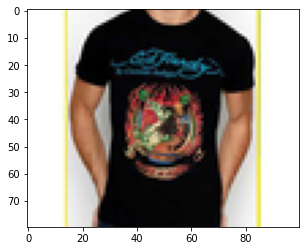

In [5]:
plt.imshow(X[0].reshape(80,100,3))

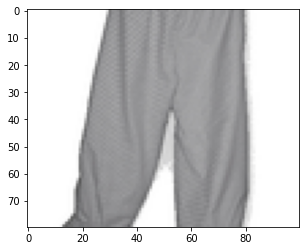

In [263]:
plt.imshow(X[1].reshape(80,100,3))

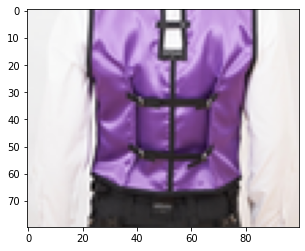

In [264]:
plt.imshow(X[5].reshape(80,100,3))

In [265]:
from sklearn.decomposition import PCA
pca = PCA(n_components=400)
pca.fit(X)

PCA(n_components=400)

In [268]:
var = pca.explained_variance_
print(var)
cum_var = np.cumsum(var)
threshold = next(x[0] for x in enumerate(cum_var) if x[1] > 0.90)

[4.19114439e+07 1.89626875e+07 5.69594730e+06 5.60965040e+06
 5.49736064e+06 4.46108557e+06 3.29427376e+06 2.30190084e+06
 2.16535507e+06 1.90935531e+06 1.48131166e+06 1.46518209e+06
 1.33308388e+06 1.31629338e+06 1.17009816e+06 1.04978755e+06
 9.37623674e+05 9.21832623e+05 7.91291786e+05 7.82351288e+05
 7.31669609e+05 7.02674109e+05 6.84253514e+05 6.65903984e+05
 5.87524177e+05 5.70503158e+05 5.57872026e+05 5.42586932e+05
 5.15425729e+05 5.11836753e+05 4.84126745e+05 4.70705852e+05
 4.62975129e+05 4.37213124e+05 4.22425489e+05 4.18570355e+05
 4.07990270e+05 3.91375383e+05 3.70210973e+05 3.59963545e+05
 3.57167513e+05 3.44093185e+05 3.40583922e+05 3.18807136e+05
 3.17909565e+05 3.09351644e+05 3.02205363e+05 2.98927998e+05
 2.95374427e+05 2.76640978e+05 2.70791776e+05 2.64637441e+05
 2.59369113e+05 2.57248225e+05 2.53857514e+05 2.49025516e+05
 2.42648182e+05 2.38752926e+05 2.38189721e+05 2.30683993e+05
 2.26038337e+05 2.22281235e+05 2.15531773e+05 2.10357555e+05
 2.07240618e+05 2.060940

In [4]:
import matplotlib.pyplot as plt
plt.plot(var, c="grey")
plt.axvline(x=threshold, color='red', label=f"0.90 variance: {threshold} PCs", linestyle="--")
plt.ylabel('Cumulative Variance Explained')
plt.xlabel('PCAs')
plt.title('Explained Cumulative Variance')
plt.legend()

NameError: name 'var' is not defined

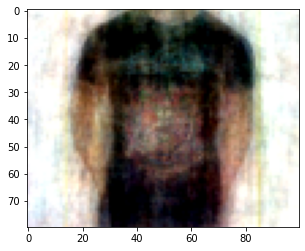

In [254]:
### This seems to be wrong – I was not able to transform the images back to the RGB space
pca=PCA(76)
pca.fit(X)
x_pca = pca.transform(X)
x_re = pca.inverse_transform(x_pca)
plt.imshow(np.clip(x_re[0].reshape(80,100,3), 0, 255).astype(np.uint8))

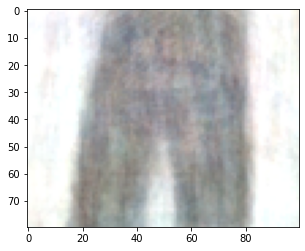

In [256]:
plt.imshow(np.clip(x_re[1].reshape(80,100,3), 0, 255).astype(np.uint8))

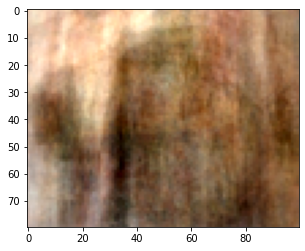

In [258]:
plt.imshow(np.clip(x_re[2].reshape(80,100,3), 0, 255).astype(np.uint8))